<a href="https://colab.research.google.com/github/zhuzihan728/metal-binding-site-prediction/blob/main/explore_biopy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 !pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.6 MB 7.0 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
%matplotlib inline

Linux cmd

In [ ]:
# !rm -rf /content/pub

In [ ]:
#!find ./ -name '*fasta' -exec rm -rf {} \;

Downloading stuffs

In [ ]:
import os  
  
if not os.path.exists('/content/drive/MyDrive/uniprot_dataset.tar'):
  !wget https://ftp.ebi.ac.uk/pub/contrib/UniProt/prediction_challenges/1_metal_binding/ChEBI-IDs_for_metal_binding.tsv
  !wget https://ftp.ebi.ac.uk/pub/contrib/UniProt/prediction_challenges/1_metal_binding/NEG_TRAIN.fasta
  !wget https://ftp.ebi.ac.uk/pub/contrib/UniProt/prediction_challenges/1_metal_binding/POS_TRAIN.fasta
  !wget https://ftp.ebi.ac.uk/pub/contrib/UniProt/prediction_challenges/1_metal_binding/POS_TRAIN.tsv
  !wget https://ftp.ebi.ac.uk/pub/contrib/UniProt/prediction_challenges/1_metal_binding/POS_TRAIN_FULL.fasta
  !wget https://ftp.ebi.ac.uk/pub/contrib/UniProt/prediction_challenges/1_metal_binding/POS_TRAIN_FULL.tsv
  !wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.12.0-Linux-x86_64.sh
  !tar -cvf /content/drive/MyDrive/uniprot_dataset.tar *.tsv *.fasta 
else:
  !tar -xvf /content/drive/MyDrive/uniprot_dataset.tar -C /content

ChEBI-IDs_for_metal_binding.tsv
POS_TRAIN_FULL.tsv
POS_TRAIN.tsv
NEG_TRAIN.fasta
POS_TRAIN.fasta
POS_TRAIN_FULL.fasta


In [ ]:
!ls

ChEBI-IDs_for_metal_binding.tsv		POS_TRAIN_FULL.fasta
drive					POS_TRAIN_FULL.tsv
Miniconda3-py37_4.12.0-Linux-x86_64.sh	POS_TRAIN.tsv
NEG_TRAIN.fasta				sample_data
POS_TRAIN.fasta


In [ ]:
from Bio import SeqIO
ls = [] # a list of [accession, sequence]
n = 0
for seq_record in SeqIO.parse("POS_TRAIN_FULL.fasta", "fasta"):
  if n < 10:
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))
    n += 1
  ls.append([seq_record.id.split('|')[1], str(seq_record.seq)])

sp|A0A023GPI8|LECA_CANBL
Seq('ADTIVAVELDTYPNTDIGDPSYPHIGIDIKSVRSKKTAKWNMQNGKVGTAHIIY...DAN')
237
sp|A0A023GS28|DIOX1_RUTGR
Seq('MAPTKDFSTTTTNGAESWDDVADFVTKKGHGVKGLSERGIKTLPKPFHQPLEER...MIN')
369
sp|A0A023GS29|DIOX2_RUTGR
Seq('MAPTKDFSTATNGADSWDDVADFVTKKGHGVKGLSERGIKTLPKPFHQPLEERF...INY')
369
sp|A0A023YYV9|NLEB2_ECOLR
Seq('MLSPIRTTFHNSVNIVQSSPCQTVSFAGKEYELKVIDEKTPILFQWFEPNPERY...SSW')
326
sp|A0A024B7W1|POLG_ZIKVF
Seq('MKNPKKKSGGFRIVNMLKRGVARVSPFGGLKRLPAGLLLGHGPIRMVLAILAFL...GVL')
3423
sp|A0A024QYT3|OST2A_ONCMY
Seq('MKSLTLLTICAVLSVSLSMNDLALDVVLDPAPDPATEPAPAADSSASSSASSSS...PPF')
167
sp|A0A024RBG1|NUD4B_HUMAN
Seq('MMKFKPNQTRTYDREGFKKRAACLCFRSEQEDEVLLVSSSRYPDQWIVPGGGME...SVR')
181
sp|A0A044RE18|BLI_ONCVO
Seq('MYWQLVRILVLFDCLQKILAIEHDSICIADVDDACPEPSHTVMRLRERNDKKAH...LRV')
693
sp|A0A059WLZ7|CNDA_RHIWD
Seq('MFLQNAWYAVAWCDEVTDGIVTRKVLGRELALFRDGEGQPRAILNRCPHRFAPL...SAG')
348
sp|A0A060LAL9|PXG_PINMS
Seq('MASNESLQTTAAMAPVTIERRVNPNLDDELPKPFLPRALVAVDTEHPSGTPGHQ...FKI')
242


In [ ]:
# check if posfull.fasta contains pos.fasta
ls1 = [] # a list of [accession, sequence]
for seq_record in SeqIO.parse("POS_TRAIN.fasta", "fasta"):
  ls1.append([seq_record.id.split('|')[1], str(seq_record.seq)] in ls)

import numpy as np
np.array(ls1).all()

True

In [ ]:
from numpy.lib.shape_base import column_stack

import pandas as pd

prot_df = pd.DataFrame(ls, columns = ['Accession', 'Prot_seq'])
 
metalb_df = pd.read_csv('POS_TRAIN_FULL.tsv', sep='\t')
 
metal_id_name_df = pd.read_csv('ChEBI-IDs_for_metal_binding.tsv', sep='\t')

print(prot_df)

print(metalb_df)

print(metal_id_name_df)

        Accession                                           Prot_seq
0      A0A023GPI8  ADTIVAVELDTYPNTDIGDPSYPHIGIDIKSVRSKKTAKWNMQNGK...
1      A0A023GS28  MAPTKDFSTTTTNGAESWDDVADFVTKKGHGVKGLSERGIKTLPKP...
2      A0A023GS29  MAPTKDFSTATNGADSWDDVADFVTKKGHGVKGLSERGIKTLPKPF...
3      A0A023YYV9  MLSPIRTTFHNSVNIVQSSPCQTVSFAGKEYELKVIDEKTPILFQW...
4      A0A024B7W1  MKNPKKKSGGFRIVNMLKRGVARVSPFGGLKRLPAGLLLGHGPIRM...
...           ...                                                ...
93889      W8JWV8  MTKTNSPAPSVITCKAAVVWKSGEPPKVEEIQVDPPKASEVRIKML...
93890      W8JWW7  MAGETTKLDLSVKAVGWGAADASGVLQPIKFYRRVPGERDVKIRVL...
93891      X1WER2  MATVEELKLRIRELENELIKSKQKQSDAEHNIRPKIEQMSAEVVDS...
93892      X5CFH4  MPTIIVTTRDGEELSLEADTGLSLMEVIRDGGADELLALCGGCCSC...
93893      X5CWH9  MPKLVVVTREGEESVIEAETGLSVMEVIRDAGIDELLALCGGCCSC...

[93894 rows x 2 columns]
       Accession     Evidence     ChEBI-ID  Position
0         P0C6X8  ECO:0000255  CHEBI:29105      6190
1         P0C6X8  ECO:0000255  CHEBI:291

In [ ]:
print(metalb_df[['ChEBI-ID', 'Position']])

           ChEBI-ID  Position
0       CHEBI:29105      6190
1       CHEBI:29105      6376
2       CHEBI:29105       693
3       CHEBI:18420        97
4       CHEBI:29105       170
...             ...       ...
409984  CHEBI:60240       318
409985  CHEBI:60240       446
409986  CHEBI:60240         8
409987  CHEBI:60240        44
409988  CHEBI:60240        92

[409989 rows x 2 columns]


In [ ]:
prot_metal_df = pd.merge(prot_df, metalb_df, on = "Accession", how = "outer")
prot_metal_name_df =  pd.merge(prot_metal_df, metal_id_name_df, on = "ChEBI-ID", how = "outer")
prot_metal_name_df

,Accession,Prot_seq,Evidence,ChEBI-ID,Position,Name,ChEBI-ID Parents
0,A0A023GPI8,ADTIVAVELDTYPNTDIGDPSYPHIGIDIKSVRSKKTAKWNMQNGK...,ECO:0000269,CHEBI:29108,19,Ca(2+),"CHEBI:60240,CHEBI:25213"
1,A0A023GPI8,ADTIVAVELDTYPNTDIGDPSYPHIGIDIKSVRSKKTAKWNMQNGK...,ECO:0000250,CHEBI:29108,208,Ca(2+),"CHEBI:60240,CHEBI:25213"
2,A0A023GPI8,ADTIVAVELDTYPNTDIGDPSYPHIGIDIKSVRSKKTAKWNMQNGK...,ECO:0000269,CHEBI:29108,14,Ca(2+),"CHEBI:60240,CHEBI:25213"
3,A0A023GPI8,ADTIVAVELDTYPNTDIGDPSYPHIGIDIKSVRSKKTAKWNMQNGK...,ECO:0000269,CHEBI:29108,12,Ca(2+),"CHEBI:60240,CHEBI:25213"
4,A0A023GPI8,ADTIVAVELDTYPNTDIGDPSYPHIGIDIKSVRSKKTAKWNMQNGK...,ECO:0000269,CHEBI:29108,10,Ca(2+),"CHEBI:60240,CHEBI:25213"
...,...,...,...,...,...,...,...
409984,P21327,MSDILQELLRVSEKAANIARACRQQETLFQLLIEEKKEGEKNKKFA...,ECO:0000305,CHEBI:49713,54,Li(+),CHEBI:25213
409985,P49441,MSDILRELLCVSEKAANIARACRQQEALFQLLIEEKKEGEKNKKFA...,ECO:0000250,CHEBI:49713,80,Li(+),CHEBI:25213
409986,P49441,MSDILRELLCVSEKAANIARACRQQEALFQLLIEEKKEGEKNKKFA...,ECO:0000250,CHEBI:49713,54,Li(+),CHEBI:25213
409987,P49442,MSDILLELLCVSEKAANIARACRQQETLFQLLIEEKKGAEKNKKFA...,ECO:0000250,CHEBI:49713,54,Li(+),CHEBI:25213


                            metal   count
0                          Zn(2+)  133807
1                          Mg(2+)   89414
2                [4Fe-4S] cluster   51607
3                          Ca(2+)   42179
4                          Mn(2+)   22438
5         a divalent metal cation   18192
6                       Fe cation   17448
7                [2Fe-2S] cluster    9036
8                       Cu cation    7395
9                            K(+)    6266
10                         Ni(2+)    3395
11                          Na(+)    2234
12                         Fe(3+)    1659
13            iron-sulfur cluster    1058
14                         Cu(2+)     934
15                         Fe(2+)     832
16               [3Fe-4S] cluster     510
17                          Cu(+)     368
18                         Cd(2+)     361
19                         Co(2+)     229
20               [8Fe-7S] cluster     176
21                 a metal cation     131
22            [Ni-4Fe-4S] cluster 

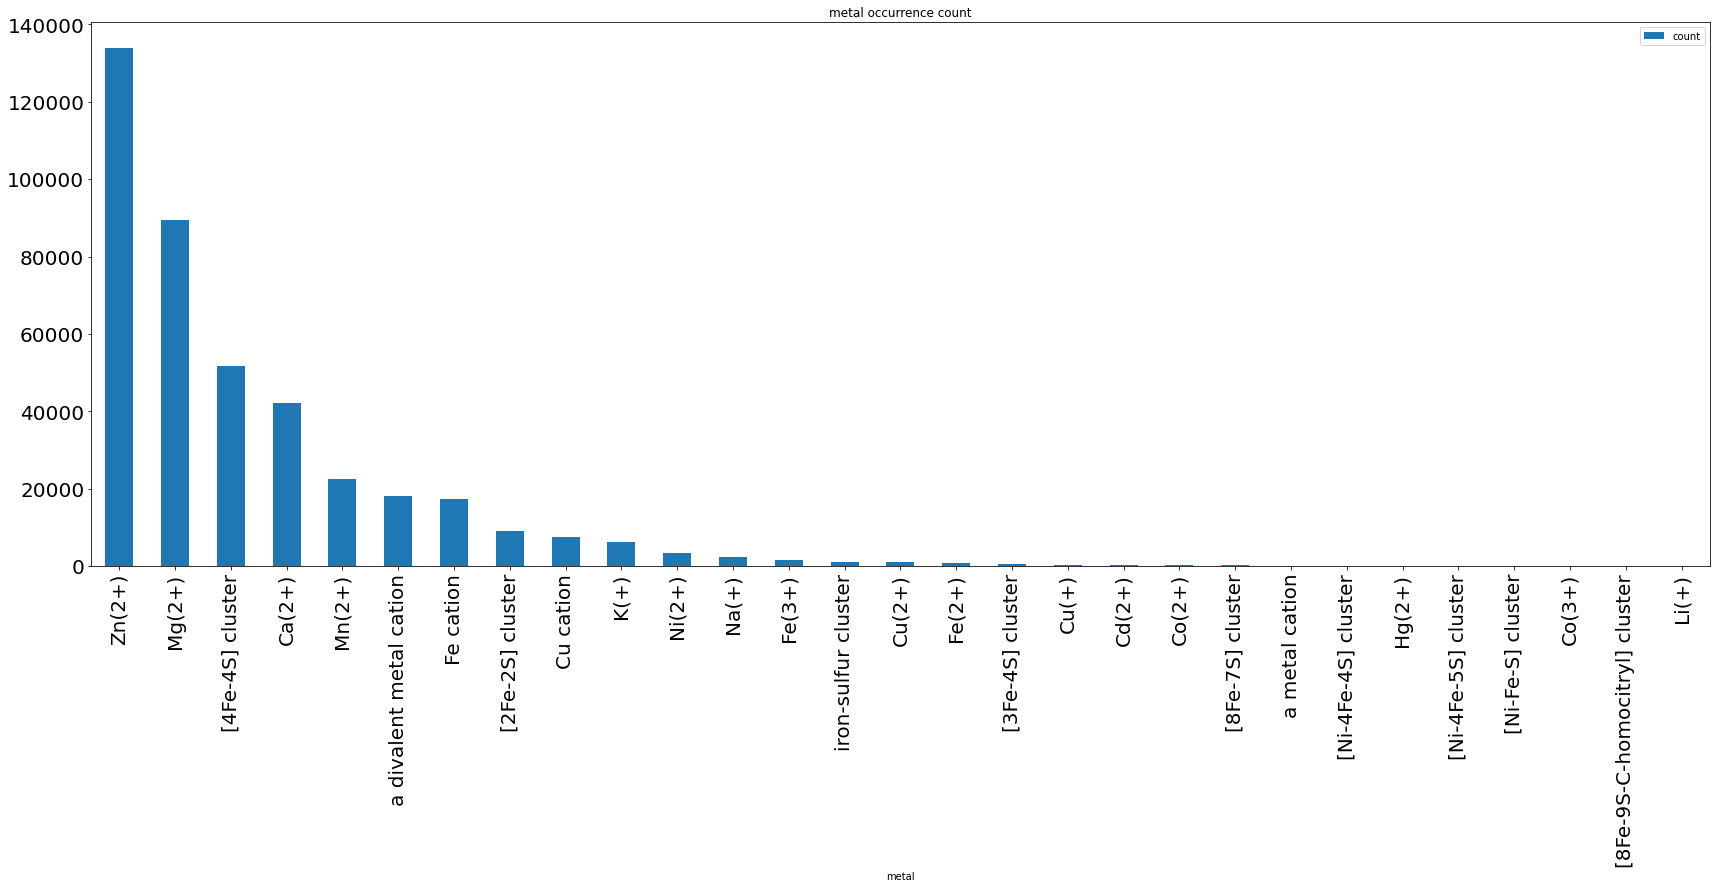

In [ ]:
metal_count_df = prot_metal_name_df['Name'].value_counts().to_frame().reset_index().rename(columns={'index':'metal', 'Name':'count'})
print(metal_count_df)

metal_count_df.plot(x="metal", y="count", kind="bar", figsize=(29,10), fontsize=20, title='metal occurrence count')


In [ ]:
prot_count_df = prot_metal_name_df['Accession'].value_counts().to_frame().reset_index().rename(columns={'index':'prot', 'Accession':'number of metals'})
prot_count_df

,prot,number of metals
0,O31526,88
1,E0VIU9,84
2,O31527,81
3,Q9Y4X5,72
4,Q7KTX7,63
...,...,...
93889,O08308,1
93890,B1IZE7,1
93891,O07565,1
93892,Q9WYI3,1


             prot   len
0      A0A023GPI8   200
1      A0A023GS28   300
2      A0A023GS29   300
3      A0A023YYV9   300
4      A0A024B7W1  3400
...           ...   ...
93889      W8JWV8   300
93890      W8JWW7   300
93891      X1WER2   300
93892      X5CFH4   100
93893      X5CWH9   100

[93894 rows x 2 columns]
    length  count
7        0   2299
3      100  13040
2      200  15682
0      300  22948
1      400  16411
..     ...    ...
60    6900      1
32    7000     11
35    7100      9
48    7300      3
62    7500      1

[64 rows x 2 columns]


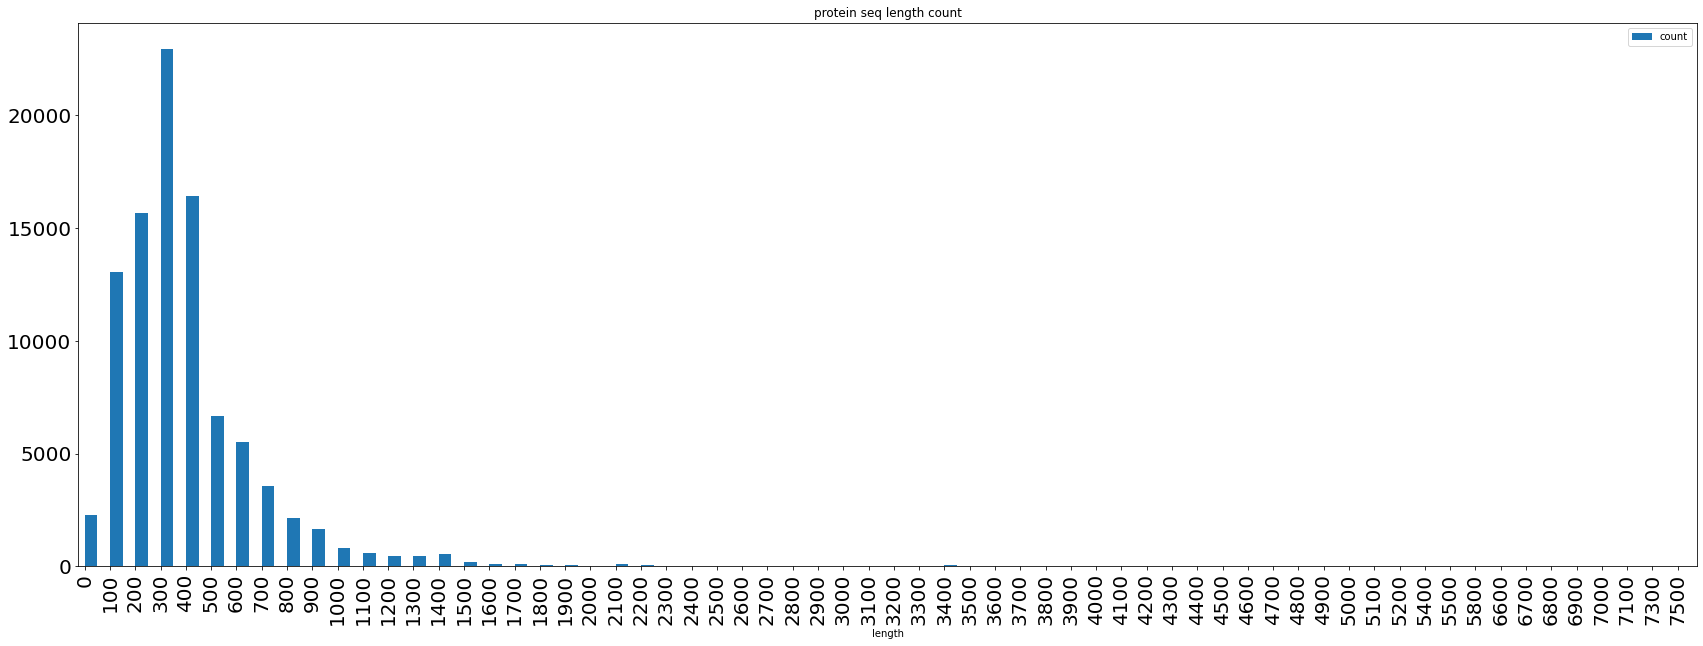

In [ ]:
prot_len_df = pd.DataFrame({'prot':prot_df['Accession'], 'len':[len(i)//100*100 for i in prot_df['Prot_seq']]})
print(prot_len_df)
protlen_count_df = prot_len_df['len'].value_counts().to_frame().reset_index().rename(columns={'index':'length', 'len':'count'}).sort_values(by=['length'])
print(protlen_count_df)
protlen_count_df.plot(x="length", y="count", kind='bar', figsize=(29,10), fontsize=20, position=0, title='protein seq length count')

In [ ]:
!bash /content/Miniconda3-py37_4.12.0-Linux-x86_64.sh


Welcome to Miniconda3 py37_4.12.0

In order to continue the installation process, please review the license
agreement.
Please, press ENTER to continue
>>> 
End User License Agreement - Miniconda

Copyright 2015-2022, Anaconda, Inc.

All rights reserved under the 3-clause BSD License:

This End User License Agreement (the "Agreement") is a legal agreement between y
ou and Anaconda, Inc. ("Anaconda") and governs your use of Miniconda.

Subject to the terms of this Agreement, Anaconda hereby grants you a non-exclusi
ve, non-transferable license to:

  * Install and use the Miniconda,
  * Modify and create derivative works of sample source code delivered in Minico
nda subject to the Terms of Service for the Repository (as defined hereinafter) 
available at https://www.anaconda.com/terms-of-service, and
  * Redistribute code files in source (if provided to you by Anaconda as source)
 and binary forms, with or without modification subject to the requirements set 
forth below.

Anaconda may,

In [ ]:
!/root/miniconda3/bin/conda create -n tutorial -c conda-forge -c bioconda mmseqs2 plass megahit prodigal hmmer sra-tools

Solving environment: - \ | / - \ | / - \ | / - done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 22.9.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /root/miniconda3/envs/tutorial

  added / updated specs:
    - hmmer
    - megahit
    - mmseqs2
    - plass
    - prodigal
    - sra-tools


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |      conda_forge           3 KB  conda-forge
    _openmp_mutex-4.5          |            2_gnu          23 KB  conda-forge
    aria2-1.36.0               |       h1e4e653_3         1.8 MB  conda-forge
    bzip2-1.0.8                |       h7f98852_4         484 KB  conda-forge
    c-ares-1.18.1              |       h7f98852_0         113 KB  conda-forge
    ca-certificate

In [ ]:
!/root/miniconda3/bin/activate tutorial

In [ ]:
!/root/miniconda3/pkgs/mmseqs2-14.7e284-pl5321hf1761c0_0/bin/mmseqs

MMseqs2 (Many against Many sequence searching) is an open-source software suite for very fast, 
parallelized protein sequence searches and clustering of huge protein sequence data sets.

Please cite: M. Steinegger and J. Soding. MMseqs2 enables sensitive protein sequence searching for the analysis of massive data sets. Nature Biotechnology, doi:10.1038/nbt.3988 (2017).

MMseqs2 Version: 14.7e284
© Martin Steinegger (martin.steinegger@snu.ac.kr)

usage: mmseqs <command> [<args>]

Easy workflows for plain text input/output
  easy-search       	Sensitive homology search
  easy-cluster      	Slower, sensitive clustering
  easy-linclust     	Fast linear time cluster, less sensitive clustering
  easy-taxonomy     	Taxonomic classification
  easy-rbh          	Find reciprocal best hit

Main workflows for database input/output
  search            	Sensitive homology search
  map               	Map nearly identical sequences
  rbh               	Reciprocal best hit search
  linclust          	F

In [ ]:
!!/root/miniconda3/pkgs/mmseqs2-14.7e284-pl5321hf1761c0_0/bin/mmseqs easy-cluster

['usage: mmseqs easy-cluster <i:fastaFile1[.gz|.bz2]> ... <i:fastaFileN[.gz|.bz2]> <o:clusterPrefix> <tmpDir> [options]',
 'options:                               ',
 ' -c FLOAT                       List matches above this fraction of aligned (covered) residues (see --cov-mode) [0.800]',
 ' --cov-mode INT                 0: coverage of query and target',
 '                                1: coverage of target',
 '                                2: coverage of query',
 '                                3: target seq. length has to be at least x% of query length',
 '                                4: query seq. length has to be at least x% of target length',
 '                                5: short seq. needs to be at least x% of the other seq. length [0]',
 ' --alignment-mode INT           How to compute the alignment:',
 '                                0: automatic',
 '                                1: only score and end_pos',
 '                                2: also start_pos and

In [ ]:
!/root/miniconda3/pkgs/mmseqs2-14.7e284-pl5321hf1761c0_0/bin/mmseqs easy-cluster /content/POS_TRAIN_FULL.fasta assembly_clustered tmp --cov-mode 1 -c 0.8

Create directory tmp
easy-cluster /content/POS_TRAIN_FULL.fasta assembly_clustered tmp --cov-mode 1 -c 0.8 

MMseqs Version:                     	14.7e284
Substitution matrix                 	aa:blosum62.out,nucl:nucleotide.out
Seed substitution matrix            	aa:VTML80.out,nucl:nucleotide.out
Sensitivity                         	4
k-mer length                        	0
k-score                             	seq:2147483647,prof:2147483647
Alphabet size                       	aa:21,nucl:5
Max sequence length                 	65535
Max results per query               	20
Split database                      	0
Split mode                          	2
Split memory limit                  	0
Coverage threshold                  	0.8
Coverage mode                       	1
Compositional bias                  	1
Compositional bias                  	1
Diagonal scoring                    	true
Exact k-mer matching                	0
Mask residues                       	1
Mask residues probability  

In [ ]:
#!cp /content/assembly_clustered_all_seqs.fasta /content/drive/MyDrive/assembly_clustered_all_seqs.fasta

In [ ]:
#!cp /content/assembly_clustered_rep_seq.fasta /content/drive/MyDrive/assembly_clustered_rep_seq.fasta

In [ ]:
#!cp /content/assembly_clustered_cluster.tsv /content/drive/MyDrive/assembly_clustered_cluster.tsv

In [ ]:
print('number of prot seqs:', len(list(SeqIO.parse("POS_TRAIN_FULL.fasta", "fasta"))))


number of prot seqs: 93894


In [ ]:
print('number of cluster reps:', len(list(SeqIO.parse("assembly_clustered_rep_seq.fasta", "fasta"))))

number of cluster reps: 4111
